本例主要演示数据折线图绘制以及曲线拟合的使用方法

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sympy import *
from scipy.stats import norm
from sklearn.metrics import r2_score
from scipy.stats import t
from scipy.optimize import curve_fit
from ExpDataAnalysis import ExpDataAnalysis as EDA
from pynverse import inversefunc

In [2]:
k=15+1/4+1/4
k

15.5

In [3]:
2*k*503.40

15605.4

In [4]:
k/200

0.0775

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='频率/Hz', ylabel='振幅/μm'>)

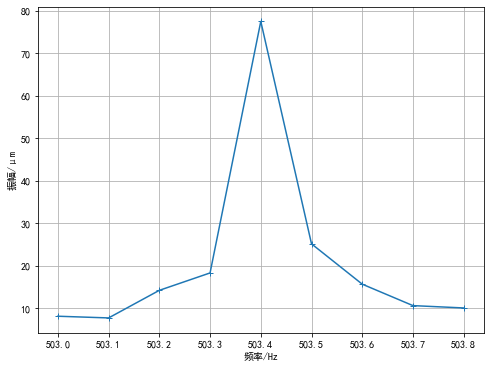

In [5]:
A1=np.array([[503.0,503.1,503.2,503.3,503.4,503.5,503.6,503.7,503.8]])
L1=np.array([[8.05,7.65,14.15,18.25,77.5,25.10,15.60,10.55,10.00]])
EDA(L1,A1).Plot(xlabel='频率/Hz',ylabel='振幅/μm',FileAdress=r'E:\Latex\FE 3\CC3\谐振曲线1.png')

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='频率/Hz', ylabel='振幅/μm'>,
 array([[0.09973594, 0.19278263]]),
 array([[0.01815422, 0.03921467]]))

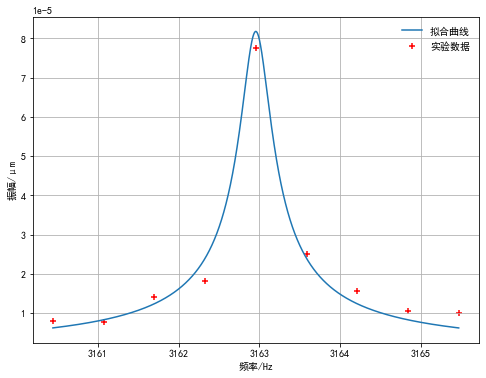

In [6]:
def func(o,M,b):
    return (M/np.sqrt(((503.4*2*np.pi)**2-o**2)**2+4*(b**2)*(o**2)))
EDA(L1*1e-6,A1*2*np.pi).CurvefitPlot(func,[10,0.009],xlabel='频率/Hz',ylabel='振幅/μm',FileAdress=r'E:\Latex\FE 3\CC3\谐振曲线拟合1.png')

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='频率/Hz', ylabel='振幅/μm'>)

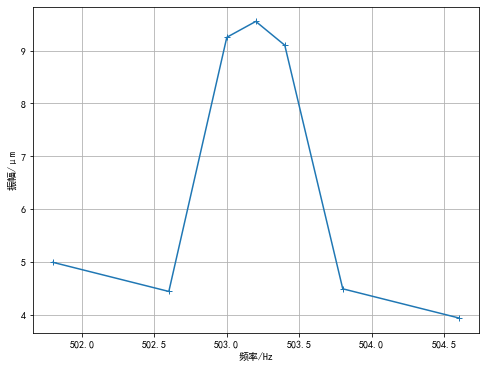

In [7]:
A3=np.array([[501.8,502.6,503.0,503.2,503.4,503.8,504.6]])
L3=np.array([[5.00,4.45,9.25,9.55,9.10,4.50,3.95]])
EDA(L3,A3).Plot(xlabel='频率/Hz',ylabel='振幅/μm',FileAdress=r'E:\Latex\FE 3\CC3\谐振曲线3.png')

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='频率/(rad$\\cdot$s$^{-1}$)', ylabel='振幅/m'>,
 array([[0.07929765, 0.41201044]]),
 array([[0.14521638, 0.83184424]]))

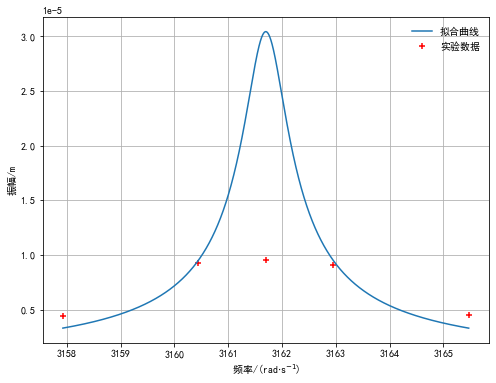

In [8]:
A3=np.array([[502.6,503.0,503.2,503.4,503.8]])
L3=np.array([[4.45,9.25,9.55,9.10,4.50]])
def func(o,M,b):
    return M/np.sqrt(((503.2*2*np.pi)**2-o**2)**2+4*(b**2)*(o**2))
EDA(L3*1e-6,A3*2*np.pi).CurvefitPlot(func,[1000,0.03],xlabel='频率/(rad$\\cdot$s$^{-1}$)',ylabel='振幅/m',FileAdress=r'E:\Latex\FE 3\CC3\谐振曲线拟合3.png')

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='频率/Hz', ylabel='振幅/μm'>)

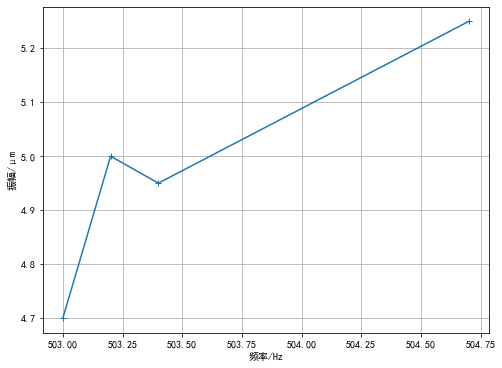

In [9]:
A4=np.array([[503.0,503.2,503.4,504.7]])
L4=np.array([[4.7,5.00,4.95,5.25]])
EDA(L4,A4).Plot(xlabel='频率/Hz',ylabel='振幅/μm',FileAdress=r'E:\Latex\FE 3\CC3\谐振曲线4.png')

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='频率/Hz', ylabel='振幅/μm'>)

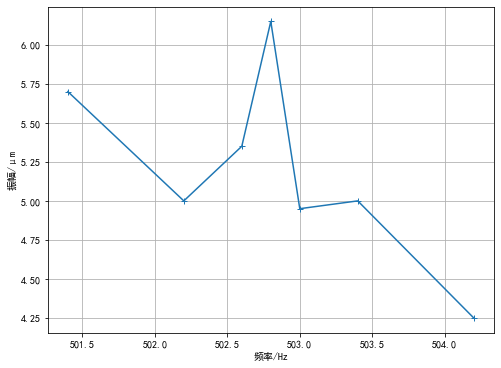

In [10]:
A2=np.array([[501.4,502.2,502.6,502.8,503.0,503.4,504.2]])
L2=np.array([[5.70,5.00,5.35,6.15,4.95,5.00,4.25]])
EDA(L2,A2).Plot(xlabel='频率/Hz',ylabel='振幅/μm',FileAdress=r'E:\Latex\FE 3\CC3\谐振曲线2.png')

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='频率/(rad$\\cdot$s$^{-1}$)', ylabel='振幅/m'>,
 array([[0.0508736 , 0.41418951]]),
 array([[0.09681897, 0.86977919]]))

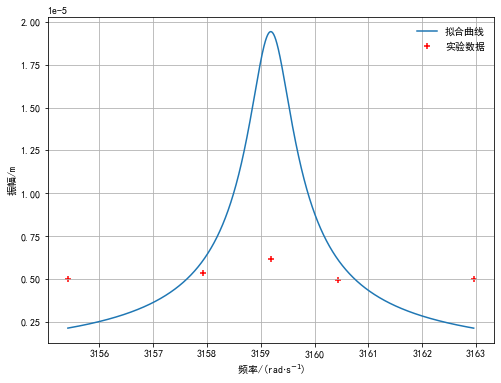

In [11]:
A2=np.array([[502.2,502.6,502.8,503.0,503.4]])
L2=np.array([[5.00,5.35,6.15,4.95,5.00]])
def func(o,M,b):
    return M/np.sqrt(((502.8*2*np.pi)**2-o**2)**2+4*(b**2)*(o**2))
EDA(L2*1e-6,A2*2*np.pi).CurvefitPlot(func,[10,0.03],xlabel='频率/(rad$\\cdot$s$^{-1}$)',ylabel='振幅/m',FileAdress=r'E:\Latex\FE 3\CC3\谐振曲线拟合2.png')

In [12]:
J=np.array([503.4**2/0.10,502.8**2/0.051,503.2**2/0.08])*4*(np.pi**2)
J

array([1.00042874e+08, 1.95695166e+08, 1.24954245e+08])

In [13]:
Jbar=(J[0]+J[2])/2
Jbar

112498559.4348807

In [14]:
k=(503.4*2*np.pi)**2
k

10004287.39145168

In [15]:
F=k/Jbar
F

0.08892813776200056

Text(0, 0.5, '振幅/m')

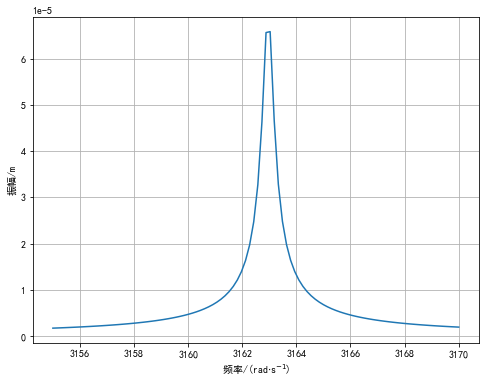

In [16]:
def bfunc(o,k,F,M,b):
    return F/(M*np.sqrt(((k/M)-o**2)**2+4*(b**2)*(o**2)))
b=0.2
M=1
o=np.linspace(3155,3170,100)
A=bfunc(o,k,F,M,b)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(o,A)
ax.grid()
ax.set_xlabel('频率/(rad$\\cdot$s$^{-1}$)')
ax.set_ylabel('振幅/m')

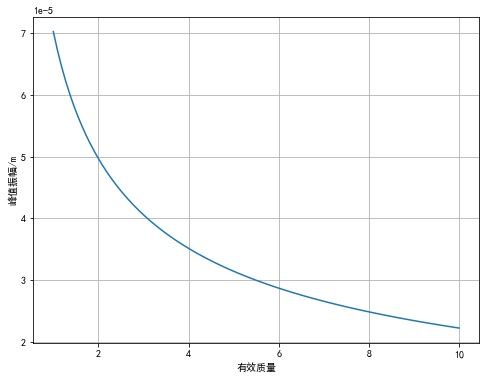

In [17]:
M=np.linspace(1,10,100)
o=np.sqrt(k/M)
B=bfunc(o,k,F,M,b)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(M,B)
ax.grid()
ax.set_xlabel('有效质量')
ax.set_ylabel('峰值振幅/m')
fig.savefig(r'E:\Latex\FE 3\CC3\峰质关系.png')

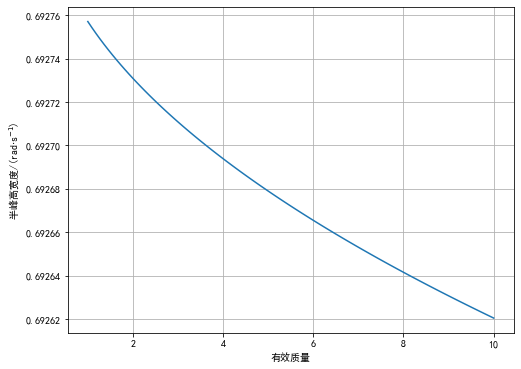

In [18]:
def cfunc(k,M,b):
    return (np.sqrt(-2*b**2+(k/M)+((2*np.sqrt(3)*np.sqrt(b**2*k-b**4*M))/np.sqrt(M)))-np.sqrt(k/M))*2
C=cfunc(k,M,b)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(M,C)
ax.grid()
ax.set_xlabel('有效质量')
ax.set_ylabel('半峰高宽度/(rad$\\cdot$s$^{-1}$)')
fig.savefig(r'E:\Latex\FE 3\CC3\宽质关系.png')

In [19]:
k/(3159.2**2)

1.0023789033873487

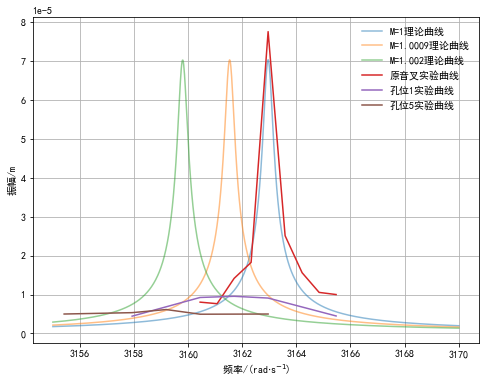

In [20]:
b=0.2
o=np.linspace(3155,3170,1000)
D1=bfunc(o,k,F,1,b)
D2=bfunc(o,k,F,1.0009,b)
D3=bfunc(o,k,F,1.002,b)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(o,D1,label='M=1理论曲线',alpha=0.5)
ax.plot(o,D2,label='M=1.0009理论曲线',alpha=0.5)
ax.plot(o,D3,label='M=1.002理论曲线',alpha=0.5)
ax.plot(A1[0]*2*np.pi,L1[0]*1e-6,label='原音叉实验曲线')
ax.plot(A3[0]*2*np.pi,L3[0]*1e-6,label='孔位1实验曲线')
ax.plot(A2[0]*2*np.pi,L2[0]*1e-6,label='孔位5实验曲线')
ax.legend(frameon=False)
ax.grid()
ax.set_xlabel('频率/(rad$\\cdot$s$^{-1}$)')
ax.set_ylabel('振幅/m')
fig.savefig(r'E:\Latex\FE 3\CC3\线型.png')